<a href="https://colab.research.google.com/github/Tatianacp1/Machine_Learning1/blob/main/Proyecto_V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Proyecto V**
### Harrison Smith Suarez Neuta
### Tatiana Chavez Perez
### Carlos Fernando Gonzalez Sarmiento
### Harold Arturo Rojas Camacho 

### Librerias necesarias para el proceso.

In [2]:
import pandas as pd
import numpy as np
import openpyxl as opx
import matplotlib.pyplot as plt

##### Link donde se obtuvieron las bases de datos de la GEIH, http://microdatos.dane.gov.co/index.php/catalog/707/get_microdata

### Lectura de bases, por drive o cargandolas directamente del escritorio.

In [3]:
from google.colab import drive #Para que permita abrir Drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
T1 = pd.read_csv('/content/drive/MyDrive/Tablas/Caracteristicas generales (Personas).csv',sep=";")
T2 = pd.read_csv('/content/drive/MyDrive/Tablas/Desocupados.csv',sep=";")
T3 = pd.read_csv('/content/drive/MyDrive/Tablas/Fuerza de trabajo.csv',sep=";")
T4 = pd.read_csv('/content/drive/MyDrive/Tablas/Inactivos.csv',sep=";")
T5 = pd.read_csv('/content/drive/MyDrive/Tablas/Ocupados.csv',sep=";")




### Union de bases de datos por el indice del "DIRECTORIO, SECUENCIA_P, ORDEN, HOGAR".


Partiendo de las siguientes variables junto el índice tomado

In [171]:
T1 = T1[['DIRECTORIO','SECUENCIA_P','ORDEN','HOGAR','DPTO','AREA','P6020','P6040']]
T2 = T2[['DIRECTORIO','SECUENCIA_P','ORDEN','HOGAR','DSI']]
T3 = T3[['DIRECTORIO','SECUENCIA_P','ORDEN','HOGAR','FT','P6240','P6250','P6260','P6270','P6280','P6290','P6300','P6320','P6330','P6340','P6350','P6351']]
T4 = T4[['DIRECTORIO','SECUENCIA_P','ORDEN','HOGAR','INI']]
T5 = T5[['DIRECTORIO','SECUENCIA_P','ORDEN','HOGAR','P6500','P6750','P6760','P6800','P6850','P6830','OCI','P6430','RAMA2D_R4']]

In [85]:
DF1 = pd.merge(T1, T2, on=['DIRECTORIO','SECUENCIA_P','ORDEN','HOGAR'],how='outer') 

In [86]:
DF2 = pd.merge(DF1,T3, on=['DIRECTORIO','SECUENCIA_P','ORDEN','HOGAR'],how='outer')

In [87]:
DF3 = pd.merge(DF2,T4, on=['DIRECTORIO','SECUENCIA_P','ORDEN','HOGAR'],how='outer')

In [89]:
DATOS = pd.merge(DF3,T5, on=['DIRECTORIO','SECUENCIA_P','ORDEN','HOGAR'],how='outer')
DATOS

,DIRECTORIO,SECUENCIA_P,ORDEN,HOGAR,DPTO,AREA,P6020,P6040,DSI,FT,P6240,P6250,P6260,P6270,P6280,P6290,P6300,P6320,P6330,P6340,P6350,P6351,INI,P6500,P6750,P6760,P6800,P6850,P6830,OCI,P6430,RAMA2D_R4
0,2187,1,1,1,97,97,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2187,1,2,1,97,97,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2187,1,3,1,97,97,2,47,NaN,1.0,4.0,2,2,2,2,,1,1,2,,,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2187,1,4,1,97,97,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2187,1,5,1,97,97,1,16,NaN,1.0,4.0,2,2,2,2,,2,,,,,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44593,5328146,1,2,1,86,86,2,55,NaN,1.0,4.0,2,2,2,2,,2,,,,,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44594,5328146,1,3,1,86,86,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44595,5328225,1,1,1,86,86,2,41,1.0,1.0,2.0,2,2,2,1,1,,,,,,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44596,5328225,1,2,1,86,86,2,16,NaN,1.0,1.0,,,,,,,,,,,,NaN,400000,,,24.0,24.0,,1.0,1.0,47.0


In [90]:
DATOS = DATOS.replace(' ', np.NaN) # Reemplzamos los valores faltantes por NaN

In [91]:
DATOS

,DIRECTORIO,SECUENCIA_P,ORDEN,HOGAR,DPTO,AREA,P6020,P6040,DSI,FT,P6240,P6250,P6260,P6270,P6280,P6290,P6300,P6320,P6330,P6340,P6350,P6351,INI,P6500,P6750,P6760,P6800,P6850,P6830,OCI,P6430,RAMA2D_R4
0,2187,1,1,1,97,97,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2187,1,2,1,97,97,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2187,1,3,1,97,97,2,47,NaN,1.0,4.0,2,2,2,2,NaN,1,1,2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2187,1,4,1,97,97,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2187,1,5,1,97,97,1,16,NaN,1.0,4.0,2,2,2,2,NaN,2,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44593,5328146,1,2,1,86,86,2,55,NaN,1.0,4.0,2,2,2,2,NaN,2,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44594,5328146,1,3,1,86,86,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44595,5328225,1,1,1,86,86,2,41,1.0,1.0,2.0,2,2,2,1,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44596,5328225,1,2,1,86,86,2,16,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400000,NaN,NaN,24.0,24.0,NaN,1.0,1.0,47.0


In [92]:
DATOS.shape # Dimensiones de nuestra base de datos

(44598, 32)

In [93]:
DATOS = DATOS.drop_duplicates() #Quitamos las filas duplicadas
DATOS.shape

(38092, 32)

In [94]:
DATOS.isna().sum() # Cuenta de NaN por cada columna o variable

DIRECTORIO         0
SECUENCIA_P        0
ORDEN              0
HOGAR              0
DPTO               0
AREA               0
P6020              0
P6040              0
DSI            34594
FT              8078
P6240           8078
P6250          20265
P6260          21345
P6270          22344
P6280          22587
P6290          34747
P6300          25932
P6320          37319
P6330          37610
P6340          37801
P6350          37868
P6351          34514
INI            25707
P6500          31731
P6750          30706
P6760          30706
P6800          23961
P6850          23961
P6830          35245
OCI            23961
P6430          23961
RAMA2D_R4      23961
dtype: int64

In [95]:
DATOS['P6040'].mean() #La edad promedio de la población encuestada para la encuesta de GEIH - Nuevos Departamentos de la Amazonia y Orinoquía 2020

29.74209807833666

In [27]:
y = DATOS['P6020'] 

In [173]:
(y==2).sum() # Total de Mujeres 

19653

In [174]:
(y==1).sum() # Total de Hombres 

18439

In [175]:
(y==2).sum()/y.count() #Porcentaje de mujeres 

0.5159351044838811

In [176]:
((y==1).sum()/y.count()) #Porcentaje de hombres 

0.48406489551611886

Text(0.5, 0, 'Mujeres                      Hombres')

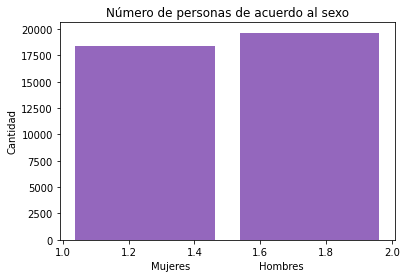

In [177]:
((y==2).sum()/y.count() - ((y==1).sum()/y.count()))*100 #Diferencia porcentual
label = ['Mujeres','Hombres'] 
plt.hist(y,bins=2, color='tab:purple', rwidth=0.85,label=label)
plt.title("Número de personas de acuerdo al sexo")
plt.ylabel("Cantidad")
plt.xlabel("Mujeres                      Hombres")

COMPARACIÓN DE LAS REGIONES


In [178]:
VA = [91,86,94,97,95] # CODIGOS DEPARTAMENTOS DE LA REGION AMAZONAS
amz = DATOS[DATOS.DPTO.isin(VA)] # Datos de la region Amazonas

In [179]:
VO = [81,85,99] # CODIGOS DEPARTAMENTOS DE LA REGION ORINOQUIA
orq = DATOS[DATOS.DPTO.isin(VO)] # Datos de la region Orinoquia


In [132]:
amz[amz['P6800'].notna()] # No tomamos los NaN's para el calculo en la variable 
amz['P6800'].mean() # El promedio de horas de trabajo semanales por persona en la region Amazonas segun la encuesta de GEIH

44.29557602638462

In [133]:
orq[orq['P6800'].notna()] # No tomamos los NaN's para el calculo en la variable 
orq['P6800'].mean() # El promedio de horas de trabajo semanales por persona en la region Orinoquia segun la encuesta de GEIH

45.95129261895841

In [134]:
amz.loc[:, ['DPTO','P6800','P6430']].max() # Selección de variables para seleccionar en cual departamento en la region del Amazonas tiene el mayor numero de horas de trabajo por persona 
# y podemos ver que en el departamento de Vaupes hay una persona que trabaja 130 horas por semana como jornalero o peon.

DPTO      97.0
P6800    130.0
P6430      9.0
dtype: float64

In [135]:
orq.loc[:, ['DPTO','P6800','P6430']].max() # Selección de variables para seleccionar en cual departamento en la region de Orinoquia tiene el mayor numero de horas de trabajo por persona 
# y podemos ver que al igual que en la region del Amazonas en el departamento de Vichada hay una persona que trabaja 130 horas por semana como jornalero o peon.

DPTO      99.0
P6800    130.0
P6430      9.0
dtype: float64

In [136]:
amz['FT'].sum(),amz['DSI'].sum() 

(18454.0, 1927.0)

In [137]:
#POBLACIÓN ECONÓMICAMENTE ACTIVA/ FUERZA DE TRABAJO
ft1 = amz['FT'].sum() #Región Amazonas
ft2 = orq['FT'].sum() #Región Orinoquía

In [138]:
#PERSONAS OCUPADAS EN CADA REGIÓN
ocu_amz = amz['OCI'].sum()
ocu_orq = orq['OCI'].sum()

In [139]:
#PERSONAS DESOCUPADAS EN CADA REGIÓN 
des_amz = amz['DSI'].sum()
des_orq = orq['DSI'].sum()

In [180]:
PET_amz = amz['OCI'].sum() + amz['DSI'].sum() + amz['INI'].sum()
PET_amz #Poblacion en edad de trabajar de la region Amazonas, PET = Población ocupada + Población desempleada + Población inactiva

18454.0

In [121]:
PET_orq = orq['OCI'].sum() + orq['DSI'].sum() + orq['INI'].sum()
PET_orq #Poblacion en edad de trabajar de la region Orinoquía, PET = Población ocupada + Población desempleada + Población inactiva

11560.0

TASAS DE OCUPACIÓN: Es la relación porcentual entre la población ocupada (OCI) y el número de personas que integran la población en edad de trabajar (PET).


In [122]:
empl1 = ocu_amz/PET_amz*100 #Para la Región del Amazonas 
empl1

47.64820635092663

In [141]:
empl2 = ocu_orq/PET_orq*100 #Para la Región de la Orinoquía 
empl2

46.1764705882353

TASAS DE DESEMPLEO: Es la relación porcentual entre el número de personas que están buscando trabajo (DS), y el número de personas que integran la fuerza laboral (PEA).


In [142]:
des1 = des_amz/ft1*100 #Para la Región Amazonas
des1

10.4421805570608

In [143]:
des2 = des_orq/ft2*100 #Para la Región de la Orinoquía
des2

13.589965397923876

Text(0, 0.5, 'Frecuencia')

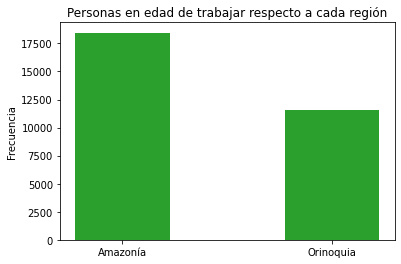

In [144]:
PET_orq-PET_amz #Diferencia de personas en edad de trabajar 
s = ["Amazonía","Orinoquia"]
m = [PET_amz,PET_orq]
plt.bar(s,m,color='tab:green',width=0.45)
plt.title("Personas en edad de trabajar respecto a cada región")
plt.ylabel("Frecuencia")


In [145]:
((amz['P6240']==1)==True).sum() #Número de personas de la región del Amazonas que trabajaron la mayor parte del tiempo la semana pasada


7385

In [146]:
((orq['P6240']==1)==True).sum() #Número de personas de la región de la Orinoquia que trabajaron la mayor parte del tiempo la semana pasada


4424

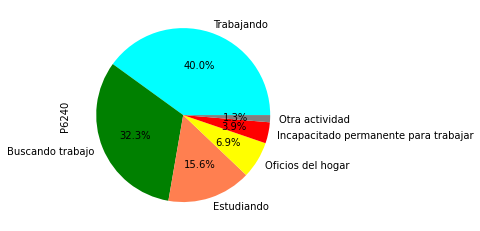

In [149]:
VA = [91,86,94,97,95] 
amz = DATOS[DATOS.DPTO.isin(VA)]
colores = ['cyan','green','coral','yellow','red', 'grey']
act = ["Trabajando","Buscando trabajo","Estudiando","Oficios del hogar","Incapacitado permanente para trabajar","Otra actividad"]
serie = amz['P6240'].value_counts()
serie.plot.pie(autopct = '%1.1f%%',labels=act,colors=colores) 
#Proporcion de las personas de las actividades que la mayor parte del tiempo la semana pasada.
#1 Trabajando
#2 Buscando trabajo
#3 Estudiando
#4 Oficios del hogar
#5 Incapacitado permanente para trabajar
#6 Otra actividad


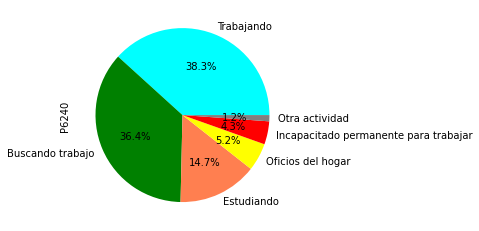

In [150]:
VO = [81,85,99] 
orq = DATOS[DATOS.DPTO.isin(VO)] 
act = ["Trabajando","Buscando trabajo","Estudiando","Oficios del hogar","Incapacitado permanente para trabajar","Otra actividad"]
serie1 = orq['P6240'].value_counts()
colores = ['cyan','green','coral','yellow','red', 'grey']
serie1.plot.pie(autopct = '%1.1f%%',labels=act,colors= colores)#Proporcion de las personas de las actividades que la mayor parte del tiempo la semana pasada.

Se puede evidenciar que en ambos departamentos la actividad más realizada en la semana pasada desde la encuesta es el trabajo seguido de que están buscando trabajo.

Text(0, 0.5, 'Frecuencia')

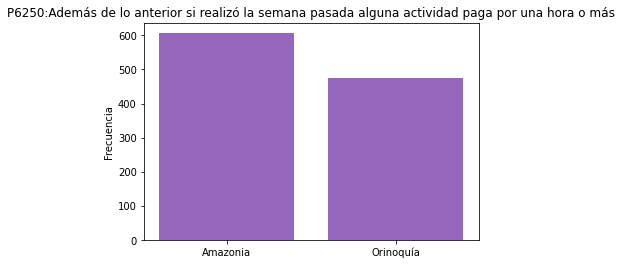

In [151]:
# Pregunta P6250: Además de lo anterior, ¿... Realizó la semana pasada alguna actividad paga por una hora o más?
#Respuesta Sí
x = ['Amazonia','Orinoquía'] 
c = [(amz['P6250']=='1').sum(),(orq['P6250']=='1').sum()]
plt.bar(x,c, color='tab:purple')
plt.title("P6250:Además de lo anterior si realizó la semana pasada alguna actividad paga por una hora o más") #Se tiene encuenta para la pregunta la respuesta sí
plt.ylabel("Frecuencia")
#La región de la Orinoquía presenta mayor cantidad de personas que si realizaron la semana pasada alguna actividad paga por una hora o más

Text(0, 0.5, 'Frecuencia')

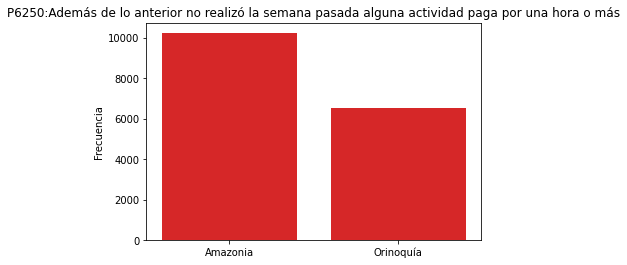

In [152]:
# Pregunta P6250: Además de lo anterior, ¿... Realizó la semana pasada alguna actividad paga por una hora o más?
#Respuesta No 
x = ['Amazonia','Orinoquía'] 
c = [(amz['P6250']=='2').sum(),(orq['P6250']=='2').sum()]
plt.bar(x,c, color='tab:red')
plt.title("P6250:Además de lo anterior no realizó la semana pasada alguna actividad paga por una hora o más") #Se tiene encuenta para la pregunta la respuesta sí
plt.ylabel("Frecuencia")
#La región de la Orinoquía presenta mayor cantidad de personas que no realizaron la semana pasada alguna actividad paga por una hora o más superando una cantidad de 100.000 personas

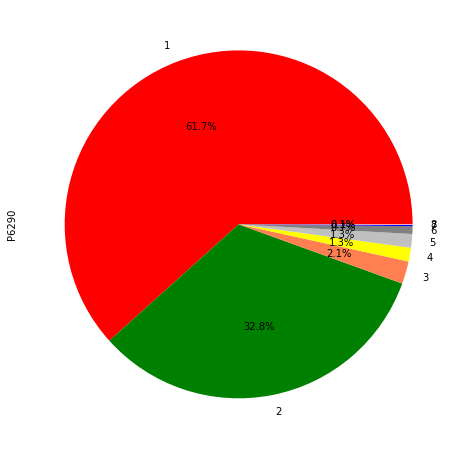

In [155]:
VA = [91,86,94,97,95] 
amz = DATOS[DATOS.DPTO.isin(VA)]
serie3 = amz['P6290'].value_counts()
colores = ['red','green','coral','yellow','silver', 'grey','blue','pink']
act = ["1","2","3","4","5","6","7","8"]
serie3.plot.pie(autopct = '%1.1f%%',labels=act,colors=colores,figsize=(8,8)) 
#¿Qué hizo ... principalmente en las ÚLTIMAS CUATRO SEMANAS para conseguir un trabajo o instalar un negocio?
#1.. Pidió ayuda a familiares, amigos, colegas
#2. Visitó, llevó o envió hojas de vida a empresas o empleadores
#3. Visitó, llevó o envió hojas de vida a bolsas de empleo o intermediarios
#4. Puso o consulto avisos clasificados
#5. Se presentó a convocatorias
#6. Hizo preparativos para iniciar un negocio
#7. Otro medio
#8. No sabe, no informa



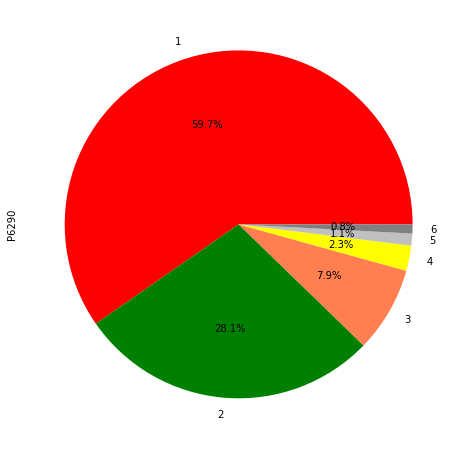

In [157]:
VO = [81,85,99] 
orq = DATOS[DATOS.DPTO.isin(VO)] 
serie4 = orq['P6290'].value_counts()
colores = ['red','green','coral','yellow','silver', 'grey','blue','pink']
act = ["1","2","3","4","5","6","7","8"]
serie4.plot.pie(autopct = '%1.1f%%',labels=act,colors=colores,figsize=(8,8)) 
#¿Qué hizo ... principalmente en las ÚLTIMAS CUATRO SEMANAS para conseguir un trabajo o instalar un negocio?
#1.. Pidió ayuda a familiares, amigos, colegas
#2. Visitó, llevó o envió hojas de vida a empresas o empleadores
#3. Visitó, llevó o envió hojas de vida a bolsas de empleo o intermediarios
#4. Puso o consulto avisos clasificados
#5. Se presentó a convocatorias
#6. Hizo preparativos para iniciar un negocio
#7. Otro medio
#8. No sabe, no informa




En ambos departamentos principalmente en las ÚLTIMAS CUATRO SEMANAS desde la encuesta para conseguir un trabajo o instalar un negocio recurrieron a pedir ayuda a familiares, amigos, colegas y como segunda opción visitaron, llevaron o enviaron hojas de vida a empresas o empleadores.



In [158]:
# ¿Cuántos meses hace que dejó de buscar trabajo por última vez?
amz['P6350'].value_counts(), orq['P6350'].value_counts()

(1     47
 2     42
 3     17
 4     16
 12    14
 6     10
 8      6
 5      4
 9      3
 7      1
 0      1
 Name: P6350, dtype: int64, 2     11
 3      7
 1      7
 5      6
 6      6
 4      6
 12     6
 8      4
 11     3
 7      3
 10     2
 0      1
 9      1
 Name: P6350, dtype: int64)

Respecto a los datos anteriores se pueden comparar la pregunta P6350: ¿Cuántos meses hace que…dejó de buscar trabajo por última vez?. Dado que es una pregunta abierta se puede evidenciar que para la región del Amazonas el mes que más se repitio fue de un mes que dejaron de buscar trabajo y para Región de la Orinoquía fue de 3 meses.

In [159]:
VA = [91,86,94,97,95] # CODIGOS DEPARTAMENTOS DE LA REGION AMAZONAS
amz = DATOS[DATOS.DPTO.isin(VA)] 
m=amz['P6500'].dropna() # No tomamos los NaN's para el calculo en la variable 
m=m.astype(float)
m.max() 
# Para la pregunta P6500: Antes de descuentos ¿cuánto ganó .... el mes pasado en este empleo. 
# El valor máximo que gano una persona en la Región del Amazonas fue de $70'000.000 incluyendo propinas y comisiones y excluya viáticos y pagos en especie)



70000000.0

In [160]:
p=orq['P6500'].dropna()
p=p.astype(float)
p.max() 
# Para la pregunta P6500: Antes de descuentos ¿cuánto ganó .... el mes pasado en este empleo. 
# El valor máximo que gano una persona en la Región de la Orinoquia fue de $28'000.000 incluyendo propinas y comisiones y excluya viáticos y pagos en especie)


28000000.0

In [161]:
m=amz['P6750'].dropna() # No tomamos los NaN's para el calculo en la variable 
m=m.astype(float)
m.max() 
# P6750: ¿Cuál fue la ganancia neta o los honorarios netos de ... en esa actividad, negocio, profesión o finca, el mes pasado ?
# Honorarios o ganancia neta en el mes pasado

#Siendo la ganancia neta máxima de una persona de la Región Amazonica $35'000.000

35000000.0

In [162]:
p=orq['P6750'].dropna()
p=p.astype(float)
p.max() 
# P6750: ¿Cuál fue la ganancia neta o los honorarios netos de ... en esa actividad, negocio, profesión o finca, el mes pasado ?
# Honorarios o ganancia neta en el mes pasado

#Siendo la ganancia neta máxima de una persona de la Región Orinoquía $20'000.000.

20000000.0

In [163]:
m=amz['P6800'].dropna() # No tomamos los NaN's para el calculo en la variable 
m.astype(float)
m.mean() 
# Para la pregunta P6800: Cuántas horas a la semana trabaja normalmente.... en ese trabajo ?
# Se obtiene que en promedio las personas de la Región del Amazonas trabajan aproximadamente 44 horas a la semana normalmente 


44.29557602638462

In [164]:
p=orq['P6800'].dropna()
p.astype(float)
p.mean() 
# Para la pregunta P6800: Cuántas horas a la semana trabaja normalmente.... en ese trabajo ?
# Se obtiene que en promedio las personas de la Región de la Orinoquia trabajan aproximadamente 46 horas a la semana normalmente 


45.95129261895841

In [165]:
m=amz['P6850'].dropna() # No tomamos los NaN's para el calculo en la variable 
m=m.astype(float)
m.mean() 
# Para la pregunta P6850: ¿Cuántas horas trabajó durante la semana pasada en este trabajo?
# Se obtiene que en promedio las personas de la Región del Amazonas trabajaron aproximadamente 39 horas respecto a la semana pasada de la encuesta



38.782895485044925

In [166]:
p=orq['P6850'].dropna()
p=p.astype(float)
p.mean() 
# Para la pregunta P6850: ¿Cuántas horas trabajó durante la semana pasada en este trabajo?
# Se obtiene que en promedio las personas de la Región de la Orinoquia trabajaron aproximadamente 40 horas respecto a la semana pasada de la encuesta
 


40.035219183214686

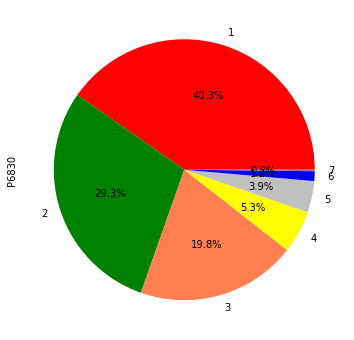

In [168]:
VA = [91,86,94,97,95] 
amz = DATOS[DATOS.DPTO.isin(VA)]
serie3 = amz['P6830'].value_counts()
colores = ['red','green','coral','yellow','silver','blue','grey']
act = ["1","2","3","4","5","6","7"]
serie3.plot.pie(autopct = '%1.1f%%',labels=act,colors=colores,figsize=(6,6)) 
# ¿Por qué razón, de las horas que normalmente trabaja, hubo algunas que no trabajó la semana pasada?
#1. Enfermedad, permiso o licencia
#2. Festivos
#3. Vacaciones
#4. Capacitación
#5.. Suspensión o terminación del empleo
#6. Reducción de la actividad económica de la empresa
#7. Otro,



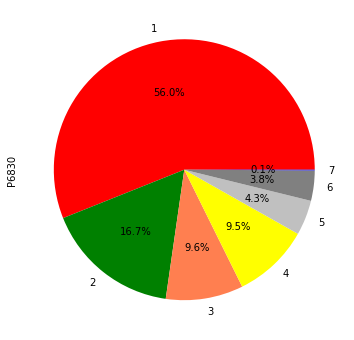

In [170]:
VO = [81,85,99] 
orq = DATOS[DATOS.DPTO.isin(VO)] 
serie4 = orq['P6830'].value_counts()
colores = ['red','green','coral','yellow','silver', 'grey','blue']
act = ["1","2","3","4","5","6","7"]
serie4.plot.pie(autopct = '%1.1f%%',labels=act,colors=colores,figsize=(6,6)) 
# ¿Por qué razón, de las horas que normalmente trabaja, hubo algunas que no trabajó la semana pasada?
#1. Enfermedad, permiso o licencia
#2. Festivos
#3. Vacaciones
#4. Capacitación
#5.. Suspensión o terminación del empleo
#6. Reducción de la actividad económica de la empresa
#7. Otro,



Se puede evidenciar notablemente en las gráficas que las primeras razones en ambas regiones porque las que no trabajó la semana pasada fueron enfermedad, permiso o licencia y festivos.